In [22]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
# Load the data
df = pd.read_excel("FEV-data-Excel.xlsx", sheet_name="Auta elektryczne")

In [24]:
# Standardize Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(".", "", regex=False)

In [26]:
# Remove Duplicate Rows
df = df.drop_duplicates()

In [28]:
# Identify and Handle Missing Values
# Show missing values
print(df.isnull().sum())

# Fill numerical columns with median (or mean), categorical with mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

car_full_name                             0
make                                      0
model                                     0
minimal_price_(gross)_[pln]               0
engine_power_[km]                         0
maximum_torque_[nm]                       0
type_of_brakes                            1
drive_type                                0
battery_capacity_[kwh]                    0
range_(wltp)_[km]                         0
wheelbase_[cm]                            0
length_[cm]                               0
width_[cm]                                0
height_[cm]                               0
minimal_empty_weight_[kg]                 0
permissable_gross_weight_[kg]             8
maximum_load_capacity_[kg]                8
number_of_seats                           0
number_of_doors                           0
tire_size_[in]                            0
maximum_speed_[kph]                       0
boot_capacity_(vda)_[l]                   1
acceleration_0-100_kph_[s]      

In [31]:
#Step 4: Remove Irrelevant or Redundant Columns
# Example: if unnamed index column exists or irrelevant columns
df = df.loc[:, ~df.columns.str.contains('^unnamed')]


In [33]:
#Step 5: Convert Data Types
# Example: convert year or numerical columns that may be strings
numeric_columns = ['price', 'range', 'power', 'battery']  # edit as per your dataset
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [37]:
# Only work with numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Calculate Q1, Q3 and IQR for numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [39]:
# Trim Whitespaces from String Columns
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip()


In [43]:
#Normalize Text Columns
# Example: make all values lowercase in 'brand' column
if 'brand' in df.columns:
    df['brand'] = df['brand'].str.lower()

In [45]:
#Create New Columns (if necessary)
# Example: Create efficiency metric
if 'range' in df.columns and 'battery' in df.columns:
    df['km_per_kwh'] = df['range'] / df['battery']

In [47]:
#Recheck and Save Cleaned Data
print(df.info())
df.to_csv("cleaned_fev_data.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 49
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   car_full_name                           35 non-null     object 
 1   make                                    35 non-null     object 
 2   model                                   35 non-null     object 
 3   minimal_price_(gross)_[pln]             35 non-null     int64  
 4   engine_power_[km]                       35 non-null     int64  
 5   maximum_torque_[nm]                     35 non-null     int64  
 6   type_of_brakes                          35 non-null     object 
 7   drive_type                              35 non-null     object 
 8   battery_capacity_[kwh]                  35 non-null     float64
 9   range_(wltp)_[km]                       35 non-null     int64  
 10  wheelbase_[cm]                          35 non-null     float64
 11  

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [53]:
# Overview of dataset
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 49
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   car_full_name                           35 non-null     object 
 1   make                                    35 non-null     object 
 2   model                                   35 non-null     object 
 3   minimal_price_(gross)_[pln]             35 non-null     int64  
 4   engine_power_[km]                       35 non-null     int64  
 5   maximum_torque_[nm]                     35 non-null     int64  
 6   type_of_brakes                          35 non-null     object 
 7   drive_type                              35 non-null     object 
 8   battery_capacity_[kwh]                  35 non-null     float64
 9   range_(wltp)_[km]                       35 non-null     int64  
 10  wheelbase_[cm]                          35 non-null     float64
 11  

,car_full_name,make,model,minimal_price_(gross)_[pln],engine_power_[km],maximum_torque_[nm],type_of_brakes,drive_type,battery_capacity_[kwh],range_(wltp)_[km],...,permissable_gross_weight_[kg],maximum_load_capacity_[kg],number_of_seats,number_of_doors,tire_size_[in],maximum_speed_[kph],boot_capacity_(vda)_[l],acceleration_0-100_kph_[s],maximum_dc_charging_power_[kw],mean_-_energy_consumption_[kwh/100_km]
count,35,35,35,35.000000,35.000000,35.000000,35,35,35.000000,35.000000,...,35.000000,35.000000,35.0,35.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
unique,35,15,35,NaN,NaN,NaN,2,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,NaN,NaN,NaN,disc (front + rear),2WD (front),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,6,1,NaN,NaN,NaN,32,17,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,216468.571429,245.742857,442.542857,NaN,NaN,62.811429,389.485714,...,2296.514286,498.285714,5.0,5.0,17.685714,174.228571,437.628571,7.405714,111.342857,18.250000
std,NaN,NaN,NaN,94186.253279,128.371094,204.100659,NaN,NaN,20.206955,104.828816,...,456.558634,83.484966,0.0,0.0,1.510189,32.557719,143.986128,2.035124,32.456254,3.568201
min,NaN,NaN,NaN,122900.000000,108.000000,225.000000,NaN,NaN,35.500000,200.000000,...,1682.000000,342.000000,5.0,5.0,15.000000,135.000000,171.000000,3.300000,37.000000,13.800000
25%,NaN,NaN,NaN,144945.000000,136.000000,302.500000,NaN,NaN,50.000000,322.000000,...,1991.500000,454.500000,5.0,5.0,16.000000,150.000000,335.000000,5.700000,100.000000,15.900000
50%,NaN,NaN,NaN,167990.000000,204.000000,395.000000,NaN,NaN,62.000000,385.000000,...,2119.000000,486.000000,5.0,5.0,17.000000,160.000000,425.000000,7.800000,100.000000,17.050000
75%,NaN,NaN,NaN,295650.000000,336.500000,540.000000,NaN,NaN,77.000000,450.500000,...,2665.000000,538.500000,5.0,5.0,19.000000,195.000000,526.500000,9.000000,150.000000,18.650000


In [55]:
# Unique values and frequency for each categorical column
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: car_full_name
car_full_name
Audi e-tron 55 quattro               1
Renault Zoe R110                     1
Nissan Leaf                          1
Nissan Leaf e+                       1
Opel Corsa-e                         1
Opel Mokka-e                         1
Peugeot e-208                        1
Peugeot e-2008                       1
Renault Zoe R135                     1
Mazda MX-30                          1
Tesla Model 3 Standard Range Plus    1
Tesla Model 3 Long Range             1
Tesla Model 3 Performance            1
Tesla Model S Long Range Plus        1
Volkswagen ID.3 Pro Performance      1
Volkswagen ID.3 Pro S                1
Mercedes-Benz EQC                    1
Kia e-Soul 64kWh                     1
Audi e-tron 50 quattro               1
Honda e                              1
Audi e-tron S quattro                1
Audi e-tron Sportback 50 quattro     1
Audi e-tron Sportback 55 quattro     1
Audi e-tron Sportback S quattro      1
BMW iX3                    

In [57]:
print("Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())


Shape: (35, 25)
Missing Values:
 car_full_name                             0
make                                      0
model                                     0
minimal_price_(gross)_[pln]               0
engine_power_[km]                         0
maximum_torque_[nm]                       0
type_of_brakes                            0
drive_type                                0
battery_capacity_[kwh]                    0
range_(wltp)_[km]                         0
wheelbase_[cm]                            0
length_[cm]                               0
width_[cm]                                0
height_[cm]                               0
minimal_empty_weight_[kg]                 0
permissable_gross_weight_[kg]             0
maximum_load_capacity_[kg]                0
number_of_seats                           0
number_of_doors                           0
tire_size_[in]                            0
maximum_speed_[kph]                       0
boot_capacity_(vda)_[l]                   0

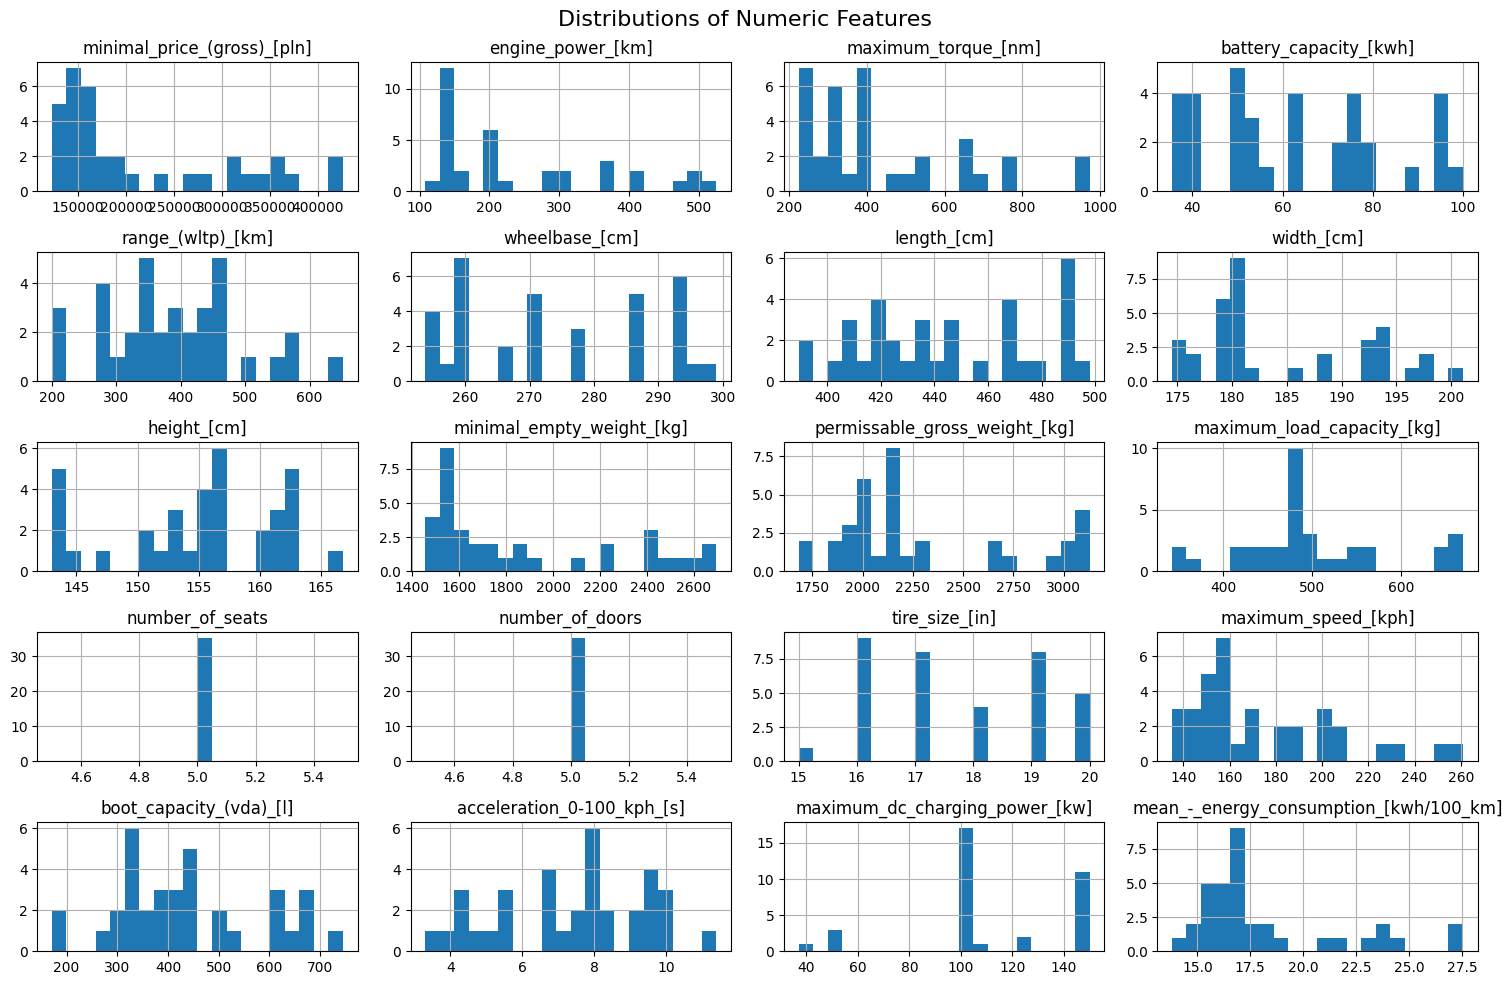

In [59]:
df.select_dtypes(include=np.number).hist(figsize=(15, 10), bins=20)
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

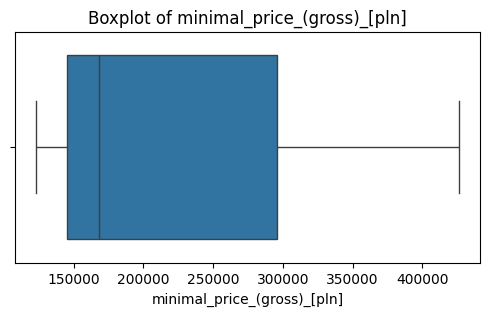

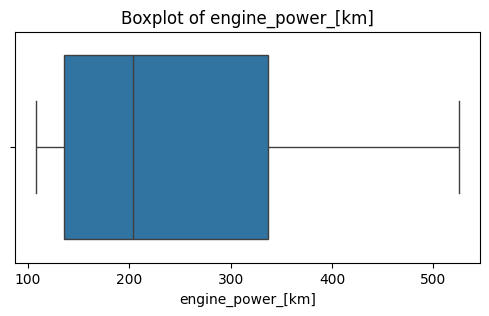

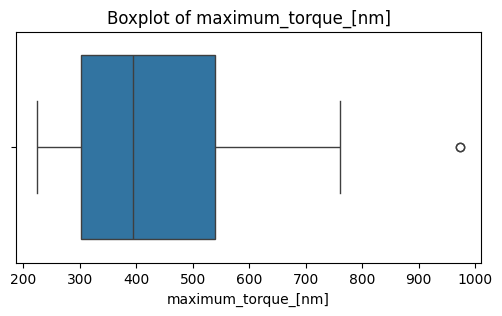

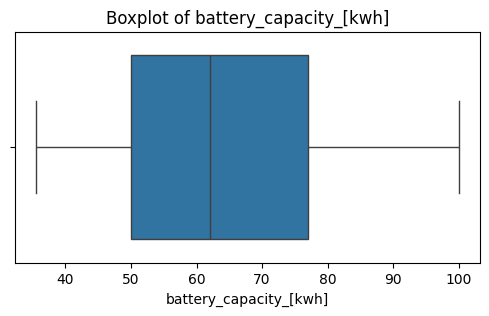

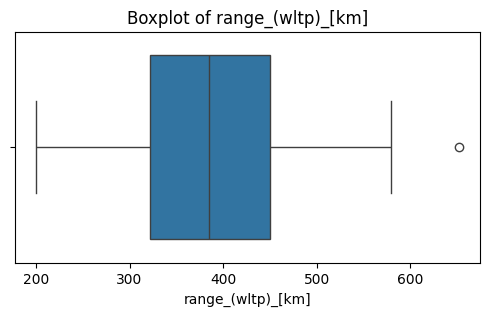

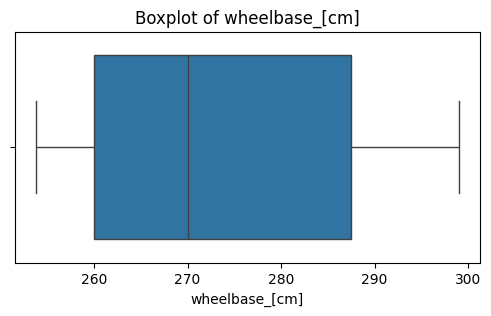

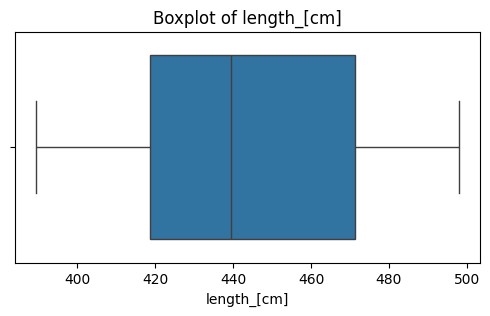

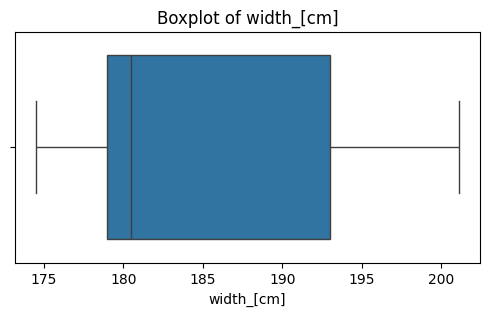

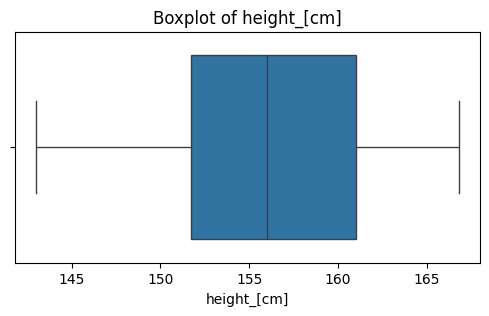

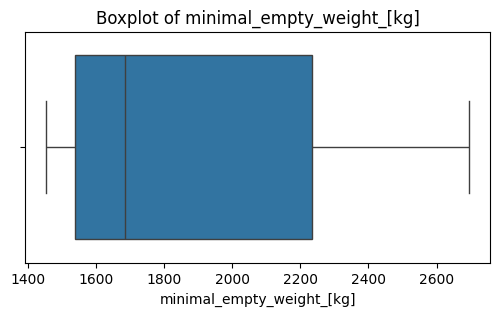

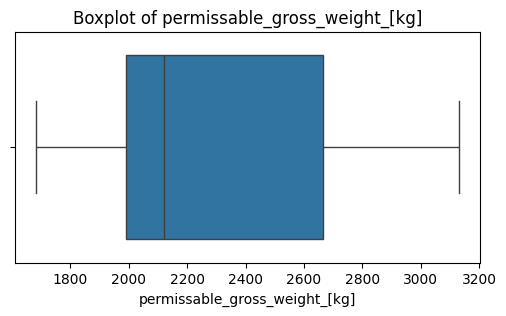

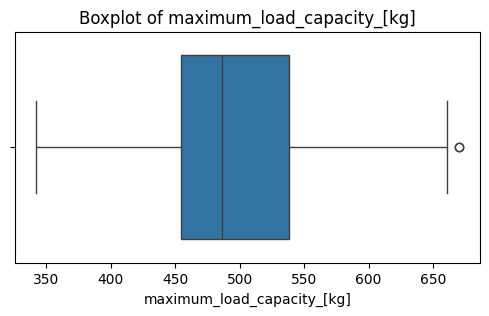

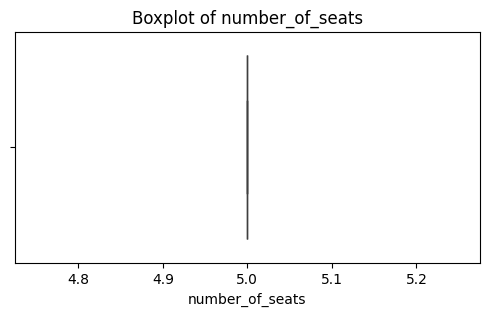

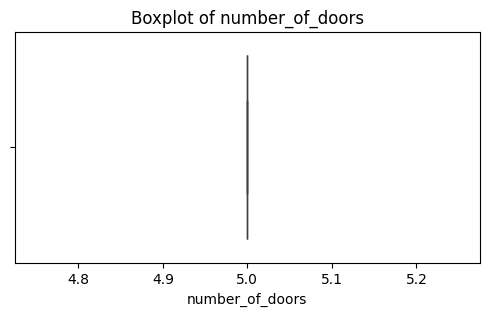

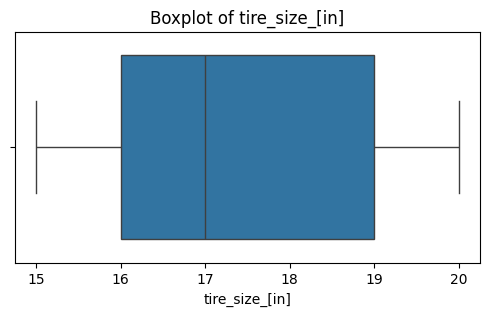

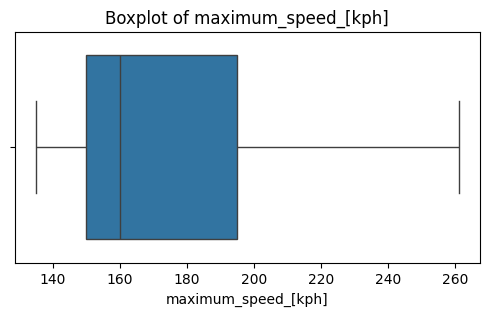

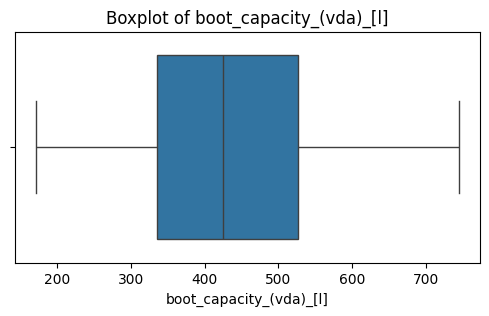

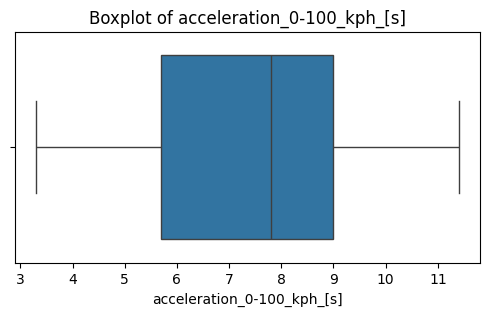

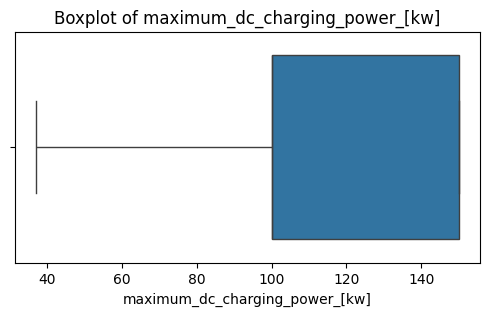

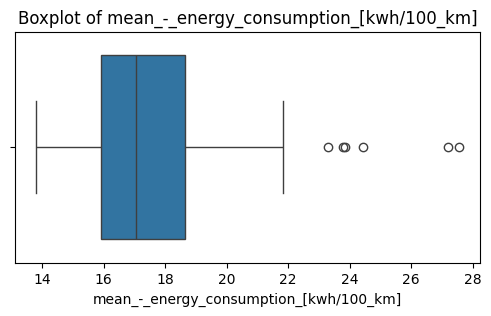

In [61]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


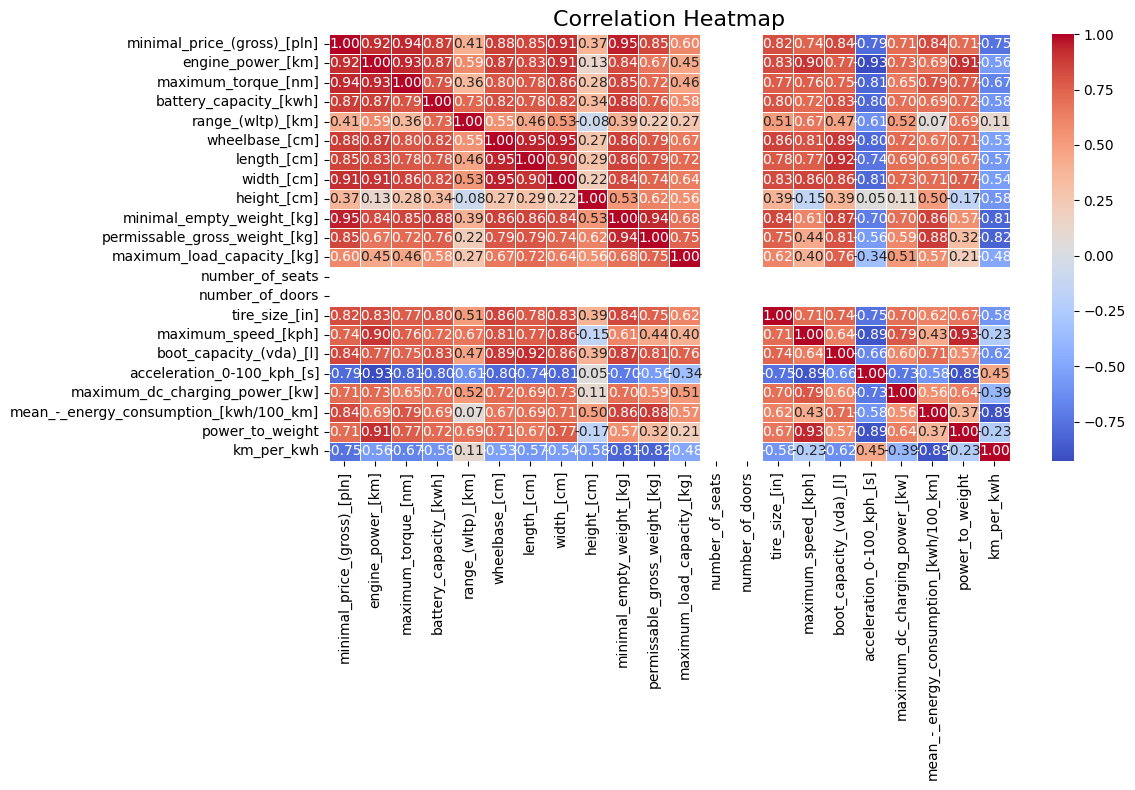

In [134]:
# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Step 2: Compute correlation matrix
corr = numeric_df.corr()

# Step 3: Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


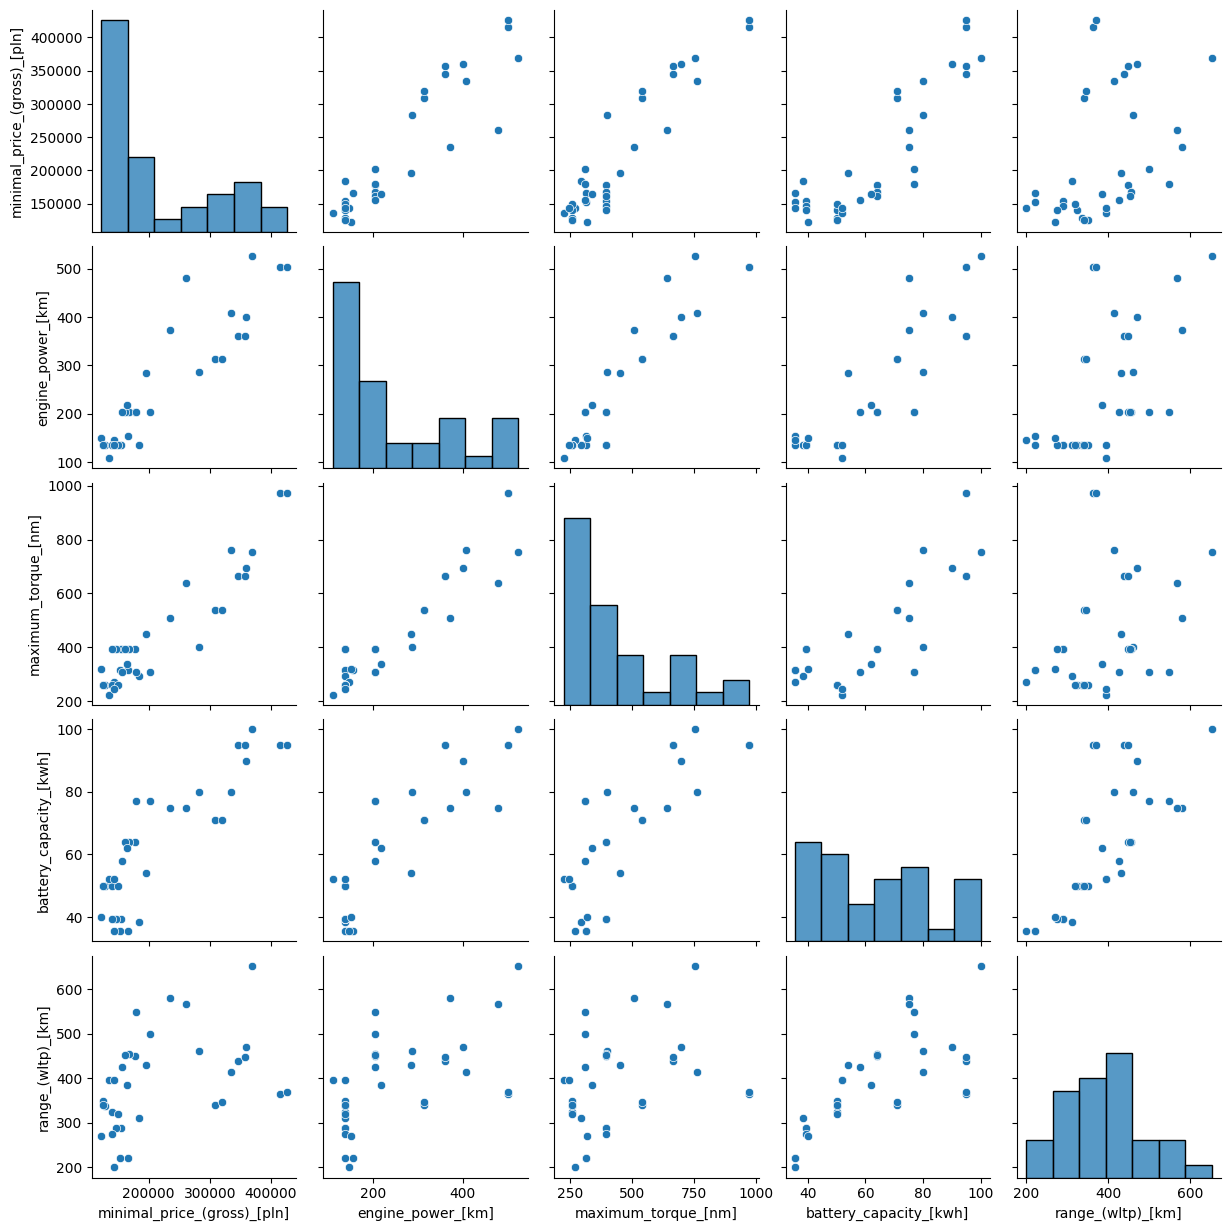

In [69]:
# Choose top 4-5 features
selected_cols = df.select_dtypes(include=np.number).columns[:5]
sns.pairplot(df[selected_cols])
plt.show()


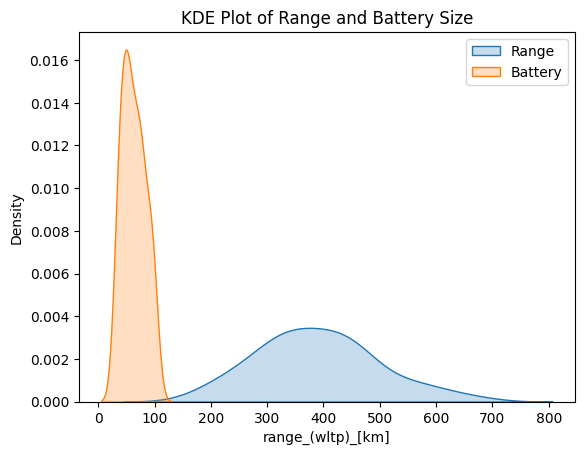

In [75]:
sns.kdeplot(data=df, x="range_(wltp)_[km]", label="Range", fill=True)
sns.kdeplot(data=df, x="battery_capacity_[kwh]", label="Battery", fill=True)

plt.legend()
plt.title("KDE Plot of Range and Battery Size")
plt.show()

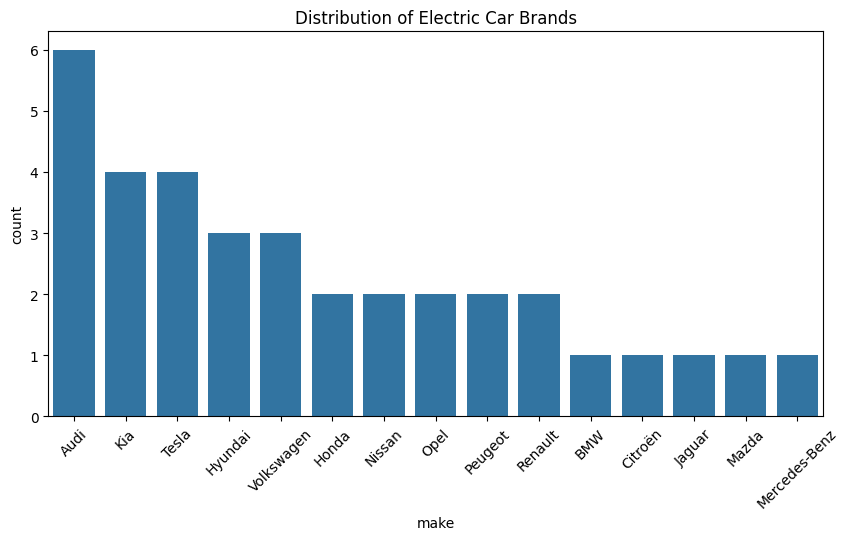

In [87]:
if 'make' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='make', order=df['make'].value_counts().index)
    plt.xticks(rotation=45)
    plt.title("Distribution of Electric Car Brands")
    plt.show()

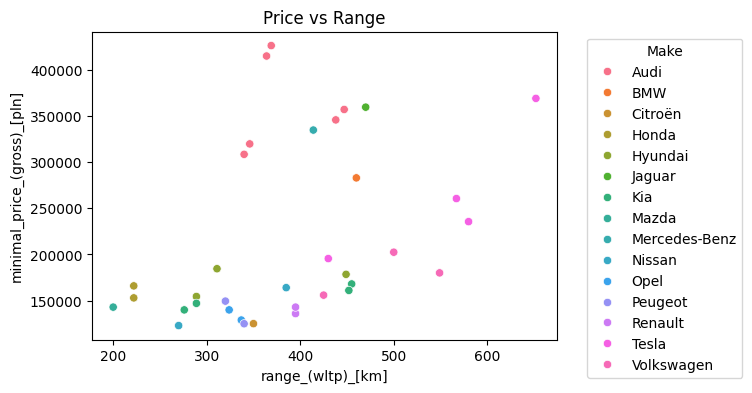

In [97]:
if 'minimal_price_(gross)_[pln]' in df.columns and 'range_(wltp)_[km]' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x='range_(wltp)_[km]', y='minimal_price_(gross)_[pln]', hue='make' if 'make' in df.columns else None)
    plt.title("Price vs Range")
    plt.legend(title="Make",bbox_to_anchor=(1.05, 1),loc='upper left')
    plt.show()

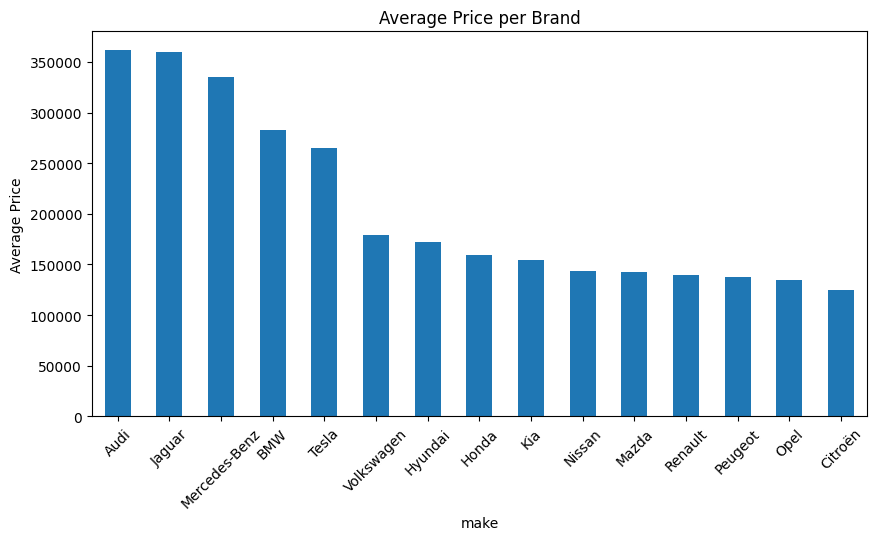

In [99]:
if 'minimal_price_(gross)_[pln]' in df.columns and 'make' in df.columns:
    avg_price = df.groupby('make')['minimal_price_(gross)_[pln]'].mean().sort_values(ascending=False)
    avg_price.plot(kind='bar', figsize=(10, 5))
    plt.title("Average Price per Brand")
    plt.ylabel("Average Price")
    plt.xticks(rotation=45)
    plt.show() 

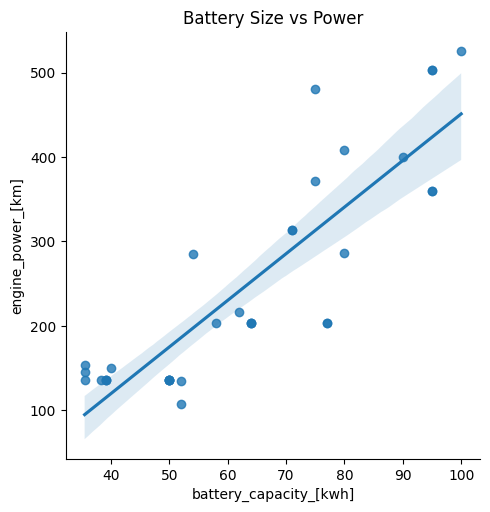

In [101]:
if 'battery_capacity_[kwh]' in df.columns and 'engine_power_[km]' in df.columns:
    sns.lmplot(data=df, x='battery_capacity_[kwh]', y='engine_power_[km]', height=5)
    plt.title("Battery Size vs Power")
    plt.show()


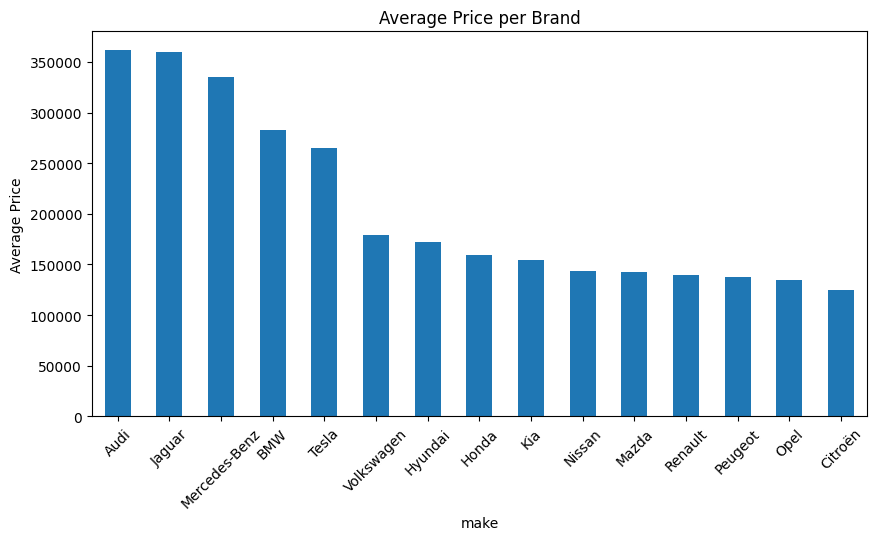

In [103]:
if 'minimal_price_(gross)_[pln]' in df.columns and 'make' in df.columns:
    avg_price = df.groupby('make')['minimal_price_(gross)_[pln]'].mean().sort_values(ascending=False)
    avg_price.plot(kind='bar', figsize=(10, 5))
    plt.title("Average Price per Brand")
    plt.ylabel("Average Price")
    plt.xticks(rotation=45)
    plt.show()

In [105]:
### Summary Table of Key Stats per Brand
if 'make' in df.columns:
    summary = df.groupby('make')[['minimal_price_(gross)_[pln]', 'range_(wltp)_[km]', 'battery_capacity_[kwh]']].agg(['mean', 'min', 'max']).round(1)
    display(summary)

minimal_price_(gross)_[pln]                 range_(wltp)_[km]  \
                                     mean     min     max              mean   
make                                                                          
Audi                             361983.3  308400  426200             384.0   
BMW                              282900.0  282900  282900             460.0   
Citroën                          125000.0  125000  125000             350.0   
Honda                            159400.0  152900  165900             222.0   
Hyundai                          172433.3  154400  184500             349.7   
Jaguar                           359500.0  359500  359500             470.0   
Kia                              153967.5  139900  167990             368.0   
Mazda                            142900.0  142900  142900             200.0   
Mercedes-Benz                    334700.0  334700  334700             414.0   
Nissan                           143450.0  122900  164000             327.5   
Opel                             134400.0  128900  139900             330.5   
Peugeot                          137150.0  124900  149400             330.0   
Renault                          139400.0  135900  142900             395.0   
Tesla                            265115.0  195490  368990             557.2   
Volkswagen                       179423.3  155890  202390             491.3   

                        battery_capacity_[kwh]               
               min  max                   mean   min    max  
make                                                         
Audi           340  447                   87.0  71.0   95.0  
BMW            460  460                   80.0  80.0   80.0  
Citroën        350  350                   50.0  50.0   50.0  
Honda          222  222                   35.5  35.5   35.5  
Hyundai        289  449                   47.2  38.3   64.0  
Jaguar         470  470                   90.0  90.0   90.0  
Kia            276  455                   51.6  39.2   64.0  
Mazda          200  200                   35.5  35.5   35.5  
Mercedes-Benz  414  414                   80.0  80.0   80.0  
Nissan         270  385                   51.0  40.0   62.0  
Opel           324  337                   50.0  50.0   50.0  
Peugeot        320  340                   50.0  50.0   50.0  
Renault        395  395                   52.0  52.0   52.0  
Tesla          430  652                   76.0  54.0  100.0  
Volkswagen     425  549                   70.7  58.0   77.0

### Correlation with Price 

In [110]:
# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include='number')

if 'minimal_price_(gross)_[pln]' in numeric_df.columns:
    correlation_with_price = numeric_df.corr()['minimal_price_(gross)_[pln]'].sort_values(ascending=False)
    print("Correlation with Price:\n", correlation_with_price)

Correlation with Price:
 minimal_price_(gross)_[pln]               1.000000
minimal_empty_weight_[kg]                 0.950410
maximum_torque_[nm]                       0.935641
engine_power_[km]                         0.920657
width_[cm]                                0.913215
wheelbase_[cm]                            0.875485
battery_capacity_[kwh]                    0.872943
length_[cm]                               0.853089
permissable_gross_weight_[kg]             0.846565
boot_capacity_(vda)_[l]                   0.844401
mean_-_energy_consumption_[kwh/100_km]    0.840784
tire_size_[in]                            0.822274
maximum_speed_[kph]                       0.737243
maximum_dc_charging_power_[kw]            0.708551
maximum_load_capacity_[kg]                0.596962
range_(wltp)_[km]                         0.410201
height_[cm]                               0.371943
acceleration_0-100_kph_[s]               -0.787005
number_of_seats                                NaN
number

### Cross-tab of Price Bin and Brand


In [114]:
if 'minimal_price_(gross)_[pln]' in df.columns and 'make' in df.columns:
    crosstab = pd.crosstab(df['make'], df['minimal_price_(gross)_[pln]'])
    display(crosstab)

minimal_price_(gross)_[pln],122900,124900,125000,128900,135900,139900,142900,146990,149400,152900,...,282900,308400,319700,334700,345700,357000,359500,368990,414900,426200
make,,,,,,,,,,,,,,,,,,,,,
Audi,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,1,1
BMW,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Citroën,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Honda,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Hyundai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Jaguar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Kia,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Mazda,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mercedes-Benz,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Power-to-Weight Ratio Distribution

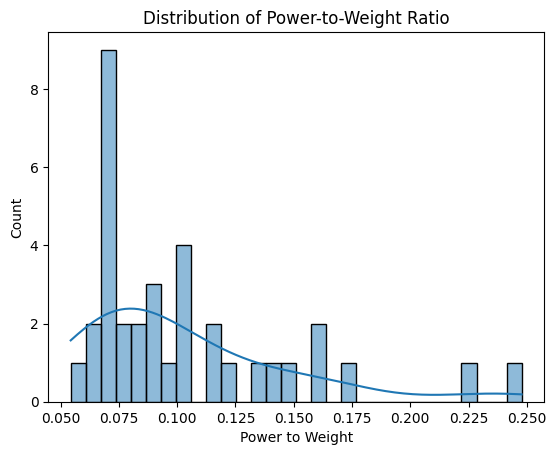

In [117]:
df['power_to_weight'] = df['engine_power_[km]'] / df['permissable_gross_weight_[kg]']

sns.histplot(df['power_to_weight'], kde=True, bins=30)
plt.title("Distribution of Power-to-Weight Ratio")
plt.xlabel("Power to Weight")
plt.show()

## Range per Battery Unit (Efficiency)

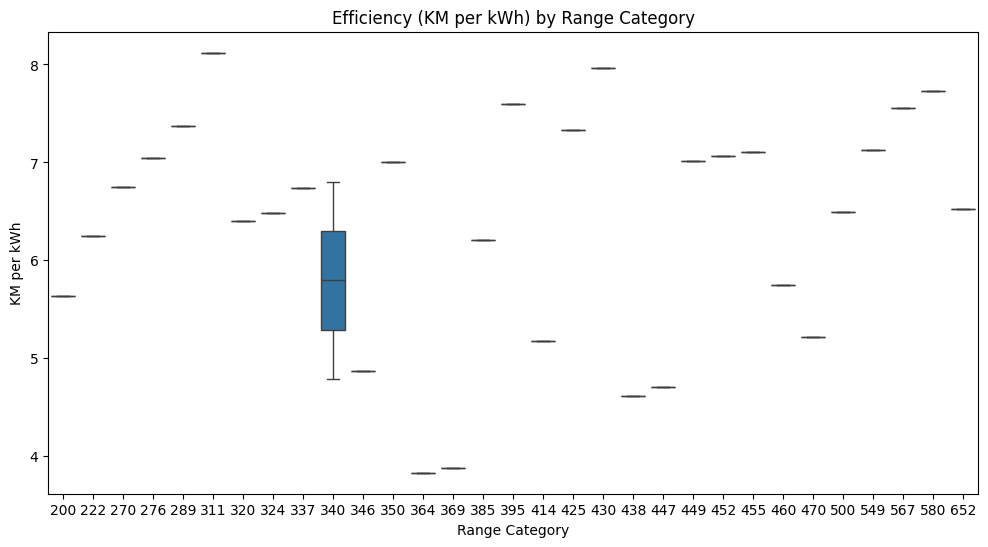

In [166]:
df['km_per_kwh'] = df['range_(wltp)_[km]'] / df['battery_capacity_[kwh]']

plt.figure(figsize=(12,6))
sns.boxplot(x='range_(wltp)_[km]', y='km_per_kwh', data=df)
plt.title("Efficiency (KM per kWh) by Range Category")
plt.ylabel("KM per kWh")
plt.xlabel("Range Category")
plt.show()

## Price per Kilometer of Range

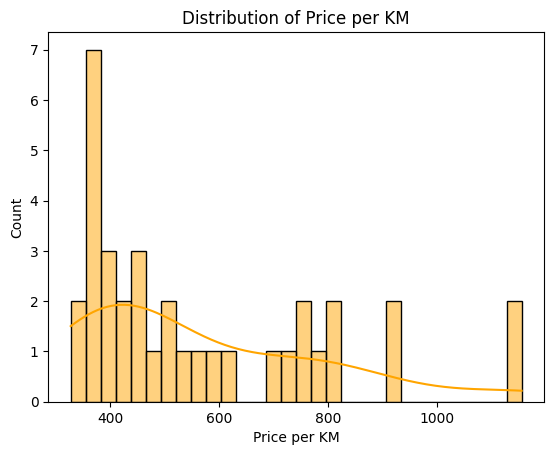

In [137]:
df['price_per_km'] = df['minimal_price_(gross)_[pln]'] / df['range_(wltp)_[km]']

sns.histplot(df['price_per_km'], kde=True, bins=30, color='orange')
plt.title("Distribution of Price per KM")
plt.xlabel("Price per KM")
plt.show()


## Binning Price into Categories

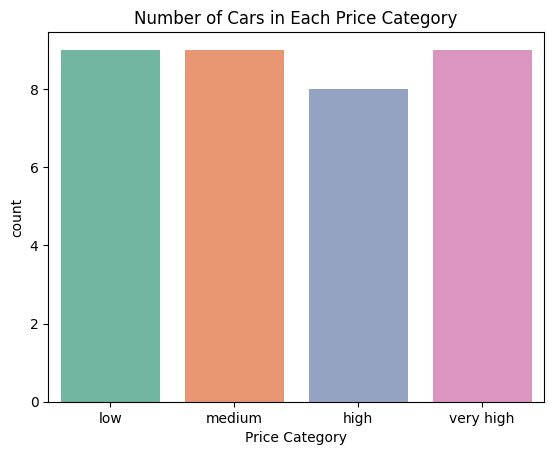

In [140]:
df['price_bin'] = pd.qcut(df['minimal_price_(gross)_[pln]'], q=4, labels=['low', 'medium', 'high', 'very high'])

sns.countplot(x='price_bin', data=df, palette='Set2')
plt.title("Number of Cars in Each Price Category")
plt.xlabel("Price Category")
plt.show()

## Binning Range into Categories

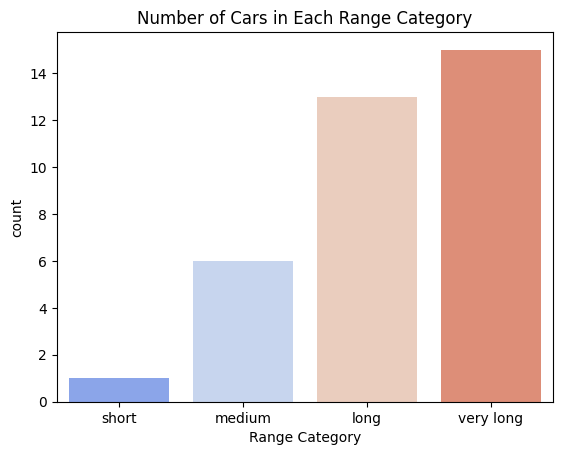

In [143]:
df['range_bin'] = pd.cut(df['range_(wltp)_[km]'], bins=[0, 200, 300, 400, np.inf], labels=['short', 'medium', 'long', 'very long'])

sns.countplot(x='range_bin', data=df, palette='coolwarm')
plt.title("Number of Cars in Each Range Category")
plt.xlabel("Range Category")
plt.show()


## Interaction Feature: Battery × Power

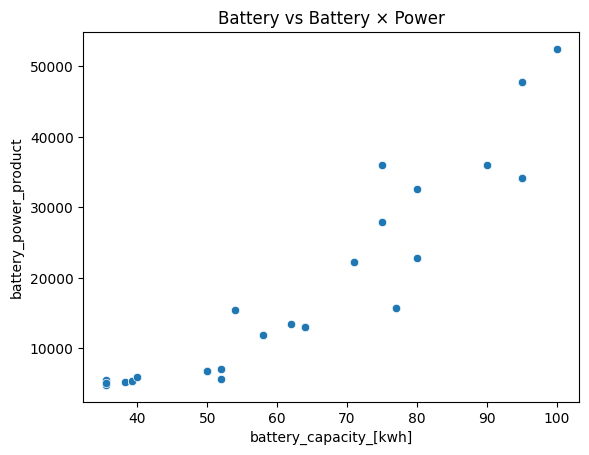

In [163]:
df['battery_power_product'] = df['battery_capacity_[kwh]'] * df['engine_power_[km]']

sns.scatterplot(x='battery_capacity_[kwh]', y='battery_power_product', data=df)
plt.title("Battery vs Battery × Power")
plt.show()

## Feature: Weight Category

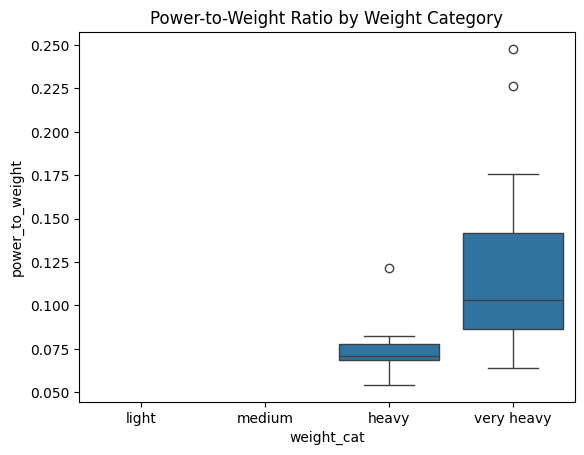

In [161]:
df['weight_cat'] = pd.cut(df['permissable_gross_weight_[kg]'], bins=[0, 1300, 1600, 2000, np.inf], labels=['light', 'medium', 'heavy', 'very heavy'])

if 'weight_cat' in df.columns and 'power_to_weight' in df.columns:
    sns.boxplot(x='weight_cat', y='power_to_weight', data=df)
    plt.title("Power-to-Weight Ratio by Weight Category")
    plt.show()

## Top 5 Cars by Driving Range

In [174]:
top_range = df.sort_values(by='range_(wltp)_[km]', ascending=False).head(5)
print("Top 5 Cars by Range:")
print(top_range[['make', 'range_(wltp)_[km]', 'battery_capacity_[kwh]', 'minimal_price_(gross)_[pln]']] )

Top 5 Cars by Range:
          make  range_(wltp)_[km]  battery_capacity_[kwh]  \
42       Tesla                652                   100.0   
40       Tesla                580                    75.0   
41       Tesla                567                    75.0   
48  Volkswagen                549                    77.0   
49  Volkswagen                500                    77.0   

    minimal_price_(gross)_[pln]  
42                       368990  
40                       235490  
41                       260490  
48                       179990  
49                       202390  


## Top 5 Most Expensive EVs

In [180]:
top_price = df.sort_values(by='minimal_price_(gross)_[pln]', ascending=False).head(5)
print("Top 5 Expensive Cars:")
print(top_price[['model', 'minimal_price_(gross)_[pln]', 'range_(wltp)_[km]', 'make']] )

Top 5 Expensive Cars:
                          model  minimal_price_(gross)_[pln]  \
5    e-tron Sportback S quattro                       426200   
2              e-tron S quattro                       414900   
42      Model S Long Range Plus                       368990   
16                       I-Pace                       359500   
4   e-tron Sportback 55 quattro                       357000   

    range_(wltp)_[km]    make  
5                 369    Audi  
2                 364    Audi  
42                652   Tesla  
16                470  Jaguar  
4                 447    Audi  


## Average Range by Brand

In [186]:
avg_range_brand = df.groupby('make')['range_(wltp)_[km]'].mean().sort_values(ascending=False).round(1)
print("Average Range by Brand:\n", avg_range_brand)

Average Range by Brand:
 make
Tesla            557.2
Volkswagen       491.3
Jaguar           470.0
BMW              460.0
Mercedes-Benz    414.0
Renault          395.0
Audi             384.0
Kia              368.0
Citroën          350.0
Hyundai          349.7
Opel             330.5
Peugeot          330.0
Nissan           327.5
Honda            222.0
Mazda            200.0
Name: range_(wltp)_[km], dtype: float64


## Range vs Battery Trend (Efficiency)

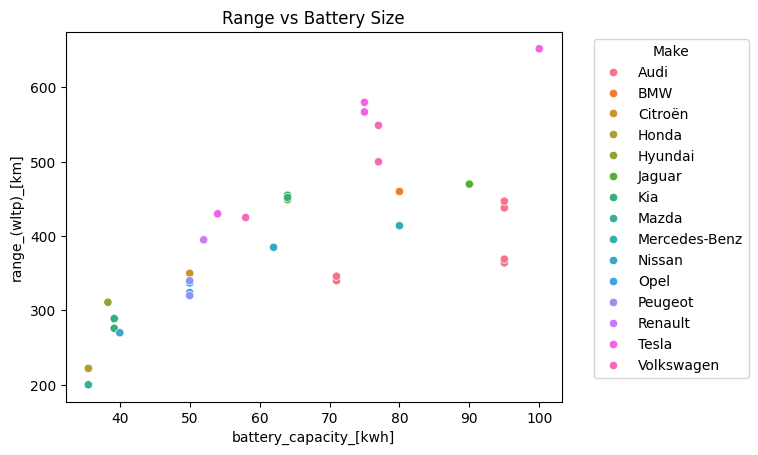

In [190]:
sns.scatterplot(x='battery_capacity_[kwh]', y='range_(wltp)_[km]', data=df, hue='make' )
plt.title("Range vs Battery Size")
plt.legend(title="Make",bbox_to_anchor=(1.05, 1),loc='upper left')
plt.show()